In [1]:
import tensorflow
import numpy as np
import pandas as pd
import os
import tensorflow.keras as keras
#zip_file=keras.utils.get_file(
#    fname="gamma_angle_position_5deg_xy.h5",
#    origin="https://zenodo.org/record/846388/files/gamma_angle_position_5deg_xy.h5?download=1",
#    extract=True

#)
#dirnam=os.path.join(os.path.dirname(zip_file), "gamma_angle_position_5deg_xy.h5")
zip_file="/feynman/scratch/dedip/stream/msahin/gamma_angle_position_5deg_xy.h5"
dirnam=os.path.join(os.path.dirname(zip_file), "gamma_angle_position_5deg_xy.h5")

import h5py
import h5py
zip_file


'/feynman/scratch/dedip/stream/msahin/gamma_angle_position_5deg_xy.h5'

In [2]:
import matplotlib.pyplot as plt
def extract_data(n):
  windows=np.empty((12,12,1))
  for i in range(n):
    window = (np.array(h5py.File(zip_file)["layer_1"][i]))
    #print(window.reshape(1,12,12).shape)
    #window=window.reshape(1,12,12)
    windows=np.dstack((windows, window))
  return windows
  

In [3]:


x=h5py.File(zip_file)
layer_0_data = (np.array(h5py.File(zip_file)["layer_0"][:]))
layer_1_data = (np.array(h5py.File(zip_file)["layer_1"][:]))
layer_2_data = (np.array(h5py.File(zip_file)["layer_2"][:]))
energy=(np.array(h5py.File(zip_file)["energy"]))
energy=energy.reshape(energy.shape[0])
print(layer_0_data.shape)

nrm_l0=np.max(layer_0_data)
nrm_l1=np.max(layer_1_data)
nrm_l2=np.max(layer_2_data)
nrm_e=np.max(energy)

rng = np.random.default_rng()
noise_l0 = rng.normal(0,167,layer_0_data.shape[0]*layer_0_data.shape[1]*layer_0_data.shape[2])
noise_l0 = noise_l0.reshape(layer_0_data.shape[0],layer_0_data.shape[1],layer_0_data.shape[2])
layer_0_data = layer_0_data + noise_l0
layer_0_data[layer_0_data<0] = 0

noise_l1 = rng.normal(0,167,layer_1_data.shape[0]*layer_1_data.shape[1]*layer_1_data.shape[2])
noise_l1 = noise_l1.reshape(layer_1_data.shape[0],layer_1_data.shape[1],layer_1_data.shape[2])
layer_1_data = layer_1_data + noise_l1
layer_1_data[layer_1_data<0] = 0

noise_l2 = rng.normal(0,167,layer_2_data.shape[0]*layer_2_data.shape[1]*layer_2_data.shape[2])
noise_l2 = noise_l2.reshape(layer_2_data.shape[0],layer_2_data.shape[1],layer_2_data.shape[2])
layer_2_data = layer_2_data + noise_l2
layer_2_data[layer_2_data<0] = 0

Layer_0_data_preprocessed=layer_0_data/nrm_l0
Layer_1_data_preprocessed=layer_1_data/nrm_l1
Layer_2_data_preprocessed=layer_2_data/nrm_l2
energy = energy / nrm_e


(500000, 3, 96)


In [4]:
Layer_0_data_preprocessed

array([[[0.        , 0.00551791, 0.        , ..., 0.00618963,
         0.        , 0.00670415],
        [0.        , 0.        , 0.00310637, ..., 0.01746229,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.00961653,
         0.        , 0.        ]],

       [[0.00851133, 0.        , 0.00489743, ..., 0.        ,
         0.00944635, 0.00588908],
        [0.        , 0.        , 0.01045971, ..., 0.        ,
         0.00206425, 0.00538627],
        [0.00026757, 0.00558551, 0.        , ..., 0.00645585,
         0.        , 0.        ]],

       [[0.        , 0.00302793, 0.        , ..., 0.        ,
         0.00371381, 0.00890111],
        [0.00224772, 0.        , 0.        , ..., 0.        ,
         0.00323603, 0.00573938],
        [0.        , 0.        , 0.00168784, ..., 0.        ,
         0.01664465, 0.00482647]],

       ...,

       [[0.        , 0.        , 0.01400492, ..., 0.00162826,
         0.        , 0.        ],
        [0.        , 

In [5]:
flatten_layer_0=Layer_0_data_preprocessed.reshape(500000,3*96)
flatten_layer_1=Layer_1_data_preprocessed.reshape(500000,12*12)
flatten_layer_2=Layer_2_data_preprocessed.reshape(500000,6*12)
from random import randint

labels=list(range(500000))




#random_selection=np.array([x for x in range (500000) if x not in random])

for i in range(int(0.6*len(flatten_layer_0))):
  n=randint(0,499999)
  random.append(n)
  train_labels.append(energy[n])
  train_layer_0.append(flatten_layer_0[n])
  train_layer_1.append(flatten_layer_1[n])
  train_layer_2.append(flatten_layer_2[n])

In [6]:
from sklearn.model_selection import train_test_split
layer_0_train, layer_0_test, energy_train, energy_test,  layer_1_train,layer_1_test, layer_2_train, layer_2_test,= train_test_split(flatten_layer_0,  energy, flatten_layer_1, flatten_layer_2,  test_size=0.4, random_state=42)
layer_0_train_2D, layer_0_test_2D, energy_train, energy_test,  layer_1_train_2D,layer_1_test_2D, layer_2_train_2D, layer_2_test2D,= train_test_split(Layer_0_data_preprocessed,  energy, Layer_1_data_preprocessed, Layer_2_data_preprocessed,  test_size=0.4, random_state=42)

In [7]:
print(layer_0_train_2D.shape)

(300000, 3, 96)



def check_data(n):
  x=layer_0_train[n].sum()*np.max(layer_0_data)+layer_1_train[n].sum()*np.max(layer_1_data)+layer_2_train[n].sum()*np.max(layer_2_data)
  n=label0_train[n]
  print(x,energy[n])
check_data(5)

lbl_tr ==> labels of training

lbl_val==>labels of validation

l0_tr, l1_tr, l2_tr will be used in training and are chosen from previously splitted training data

l0_tr,l0_val,l1_tr,l1_val,l2_tr,l2_val,lbl_tr,lbl_val= train_test_split(layer_0_train,layer_1_train,layer_2_train, label0_train, test_size=0.2, random_state=42)
del(l0_tr,l0_val,l1_tr,l1_val,l2_tr,l2_val,lbl_tr,lbl_val)

In [8]:

lc1_test=np.array([np.concatenate((layer_0_test, layer_1_test, layer_2_test),axis=1)  ])
lc1_train=np.array([np.concatenate((layer_0_train, layer_1_train, layer_2_train),axis=1)  ])
lc1_train=lc1_train.reshape(lc1_train.shape[1],lc1_train.shape[2])
lc1_test=lc1_test.reshape(lc1_test.shape[1],lc1_test.shape[2])


In [9]:
print(lc1_test.shape) 
print(energy_test.shape)
print(lc1_train.shape)
print(energy_train.shape) 

(200000, 504)
(200000,)
(300000, 504)
(300000,)


test_layer_0 = np.array([flatten_layer_0[i] for i in range(len(flatten_layer_0)) if i not in random])
test_layer_1 = np.array([flatten_layer_1[i] for i in range(len(flatten_layer_0)) if i not in random])
test_layer_2 = np.array([flatten_layer_2[i] for i in range(len(flatten_layer_0)) if i not in random])

In [10]:
def run_experiment(model, x_train, y_train):
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.003),
        loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")#,
        #metrics=tf.keras.metrics.BinaryAccuracy(),
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=50, restore_best_weights=True
    )
    
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=50,
        batch_size=2028,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    return history

In [11]:
import keras.layers as layers
import tensorflow as tf
hidden_units = [1024, 512,64]
def dnn(hidden_units, num_classes, dropout_rate):
    inputs = layers.Input(shape=(144+(96*3)+72,), name="input_features")
    x = inputs
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="dnn")


baseline_model = dnn(hidden_units, 1, 0)
baseline_model.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_features (InputLayer)  [(None, 504)]            0         
                                                                 
 dense (Dense)               (None, 1024)              517120    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0       

2022-10-02 12:14:23.814299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 12:14:24.115214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38420 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:25:00.0, compute capability: 8.0


In [12]:
def cnn(hidden_units, num_classes, dropout_rate):
    inputs0 = layers.Input(shape=(3,96,1,), name="input_features_l0")
    inputs1 = layers.Input(shape=(12,12,1,), name="input_features_l1")
    inputs2 = layers.Input(shape=(12,6,1,), name="input_features_l2")
    cnn0 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs0)
    cnn0 = layers.Conv2D(64, 3, activation='relu')(cnn0)
    # cnn0 = layers.Conv2D(64, 5, activation='relu')(cnn0)
    cnn0 = layers.Flatten()(cnn0)
    inputs0_flat = layers.Flatten()(inputs0)
    cnn0Comb = layers.Concatenate()([cnn0,inputs0_flat])
    cnn1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs1)
    cnn1 = layers.Conv2D(64, 3, activation='relu')(cnn1)
    cnn1 = layers.Conv2D(128, 5, activation='relu')(cnn1)
    cnn1 = layers.Flatten()(cnn1)
    inputs1_flat = layers.Flatten()(inputs1)
    cnn1Comb = layers.Concatenate()([cnn1,inputs1_flat])
    cnn2 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs2)
    cnn2 = layers.Conv2D(64, 3, activation='relu')(cnn2)  
    cnn2 = layers.Conv2D(128, 3, activation='relu')(cnn2)      
    cnn2 = layers.Flatten()(cnn2)
    inputs2_flat = layers.Flatten()(inputs2)
    cnn2Comb = layers.Concatenate()([cnn2,inputs2_flat])
    x =  layers.Concatenate()([cnn0Comb,cnn1Comb,cnn2Comb])
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
       # x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=(inputs0,inputs1,inputs2), outputs=logits, name="dnn")

In [13]:
cnn_model = cnn(hidden_units, 1, 0.1)
cnn_model.summary()


Model: "dnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features_l1 (InputLayer)  [(None, 12, 12, 1)]  0          []                               
                                                                                                  
 input_features_l2 (InputLayer)  [(None, 12, 6, 1)]  0           []                               
                                                                                                  
 input_features_l0 (InputLayer)  [(None, 3, 96, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 12, 12, 32)   320         ['input_features_l1[0][0]']      
                                                                                                

In [14]:
history_cnn=run_experiment(cnn_model,[layer_0_train_2D,layer_1_train_2D,layer_2_train_2D],energy_train)

Epoch 1/50


2022-10-02 12:14:25.747437: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8301
2022-10-02 12:14:26.314086: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-10-02 12:14:26.529357: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


119/119 [==============================] - 4s 19ms/step - loss: 0.0690 - val_loss: 1.6003e-04
Epoch 2/50
119/119 [==============================] - 2s 14ms/step - loss: 1.7141e-04 - val_loss: 1.4399e-04
Epoch 3/50
119/119 [==============================] - 2s 14ms/step - loss: 1.6179e-04 - val_loss: 1.4524e-04
Epoch 4/50
119/119 [==============================] - 2s 14ms/step - loss: 1.5714e-04 - val_loss: 1.3150e-04
Epoch 5/50
119/119 [==============================] - 2s 14ms/step - loss: 1.5341e-04 - val_loss: 1.2899e-04
Epoch 6/50
119/119 [==============================] - 2s 14ms/step - loss: 1.5637e-04 - val_loss: 1.3677e-04
Epoch 7/50
119/119 [==============================] - 2s 14ms/step - loss: 1.6487e-04 - val_loss: 1.2425e-04
Epoch 8/50
119/119 [==============================] - 2s 14ms/step - loss: 1.4521e-04 - val_loss: 1.4303e-04
Epoch 9/50
119/119 [==============================] - 2s 14ms/step - loss: 1.4607e-04 - val_loss: 1.2143e-04
Epoch 10/50
119/119 [=============

In [15]:
x_train=lc1_train

y_train=energy_train
x=run_experiment(baseline_model, x_train, y_train)

Epoch 1/50
119/119 [==============================] - 1s 3ms/step - loss: 0.0219 - val_loss: 6.6473e-04
Epoch 2/50
119/119 [==============================] - 0s 2ms/step - loss: 4.0374e-04 - val_loss: 2.3360e-04
Epoch 3/50
119/119 [==============================] - 0s 2ms/step - loss: 2.1167e-04 - val_loss: 1.6038e-04
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 1.7306e-04 - val_loss: 1.4296e-04
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 1.6141e-04 - val_loss: 1.3686e-04
Epoch 6/50
119/119 [==============================] - 0s 2ms/step - loss: 1.5651e-04 - val_loss: 1.3264e-04
Epoch 7/50
119/119 [==============================] - 0s 2ms/step - loss: 1.5419e-04 - val_loss: 1.2951e-04
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 1.5087e-04 - val_loss: 1.2909e-04
Epoch 9/50
119/119 [==============================] - 0s 2ms/step - loss: 1.4790e-04 - val_loss: 1.3109e-04
Epoch 10/50
119/119 [===========

In [16]:
def check_data(n):
  x=np.sum(layer_0_test[n])*nrm_l0+np.sum(layer_1_test[n])*nrm_l1+np.sum(layer_2_test[n])*nrm_l2
  y=energy_test[n]*nrm_e*1000
  print(x,y)
check_data(5)



45071.36803263733 10205.808976085407


In [17]:
cnn_predict = cnn_model.predict(x=[layer_0_test_2D,layer_1_test_2D,layer_2_test2D], verbose=1)

6250/6250 [==============================] - 8s 1ms/step


In [18]:
dnn_predict = baseline_model.predict(x=lc1_test, verbose=0)

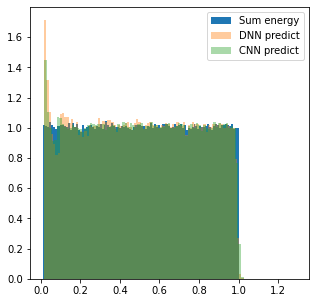

In [19]:
energy = np.array(energy)
dnn_predict = np.array(dnn_predict)
cnn_predict = np.array(cnn_predict)
fig, ax = plt.subplots(1,1,figsize=[5,5])

ax.hist(energy,bins= 100, density= True, label="Sum energy") 
ax.hist(dnn_predict,bins= 100, density = True , alpha = 0.4,  label="DNN predict")
ax.hist(cnn_predict,bins= 100, density = True, alpha = 0.4, label="CNN predict")

plt.legend()


In [20]:
def display_learning_curves(history):
    fig, (ax1) = plt.subplots(1, 2, figsize=(5, 5))

    ax1[0].plot(x.history["loss"])
    ax1[0].plot(x.history["val_loss"])
    ax1[0].legend(["train", "test"], loc="upper right")
    ax1[0].set_xlabel("Epochs")
    ax1[0].set_ylabel("loss")
    ax1[1].plot(history_cnn.history["loss"])
    ax1[1].plot(history_cnn.history["val_loss"])
    ax1[1].legend(["train", "test"], loc="upper right")
    ax1[1].set_xlabel("Epochs")
    ax1[1].set_ylabel("loss")
    plt.ylim(top  = 0.01, bottom = 0.0)
 #   ax2.plot(history.history["loss"])
 #   ax2.plot(history.history["mse"])
 #   ax2.legend(["train", "test"], loc="upper right")
 #   ax2.set_xlabel("Epochs")
 #   ax2.set_ylabel("loss")
    plt.show()


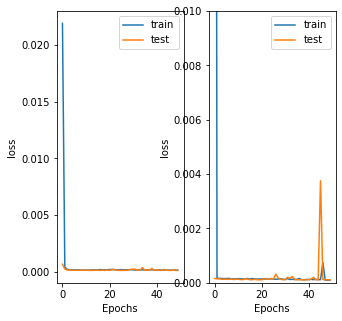

In [21]:
display_learning_curves(x)

In [24]:
dnn_predict = dnn_predict.reshape(dnn_predict.shape[0])
energy_cut  = 0 / (nrm_e * 1000)
dnn_diff_pred = (dnn_predict[energy_test>energy_cut] - energy_test[energy_test>energy_cut])/ energy_test[energy_test>energy_cut]
diff_sum = (np.sum(layer_0_test[energy_test>energy_cut],axis=1)*nrm_l0+np.sum(layer_1_test[energy_test>energy_cut],axis=1)*nrm_l1+np.sum(layer_2_test[energy_test>energy_cut],axis=1)*nrm_l2 - energy_test[energy_test>energy_cut]*nrm_e*1000 + 0.0068*energy_test[energy_test>energy_cut]*nrm_e*1000)/(energy_test[energy_test>energy_cut]*nrm_e*1000)
print(np.argmin(diff_sum))
print(np.sum(diff_sum>0))

print(np.std(dnn_diff_pred))
print(np.std(diff_sum))
print(np.mean(dnn_diff_pred))
print(np.mean(diff_sum))

141083
199972
0.07549924953238761
2.9461857256898933
-0.0100440942891504
1.503293591943032


In [25]:

def check_predict(n):
    print(cnn_predict[n], energy_test[n], (diff_sum[n]*energy_test[n]*nrm_e+energy_test[n]*nrm_e)/100)
check_predict(100)

[0.8706928] 0.870694666065143 1.188074822614992


In [26]:
Cnn_nparr=np.array([cnn_predict]).reshape(200000)

(array([982., 666., 684., 701., 675., 629., 562., 554., 546., 537., 541.,
        524., 492., 493., 497., 477., 460., 484., 446., 461., 449., 451.,
        467., 506., 473., 521., 560., 542., 550., 572., 538., 555., 544.,
        571., 512., 543., 532., 518., 526., 496., 536., 484., 517., 529.,
        506., 509., 503., 501., 522., 502., 516., 496., 525., 522., 491.,
        542., 526., 506., 490., 531., 510., 509., 490., 524., 533., 507.,
        531., 534., 486., 489., 484., 460., 547., 545., 493., 470., 493.,
        514., 474., 526., 497., 518., 509., 528., 503., 497., 543., 485.,
        488., 583., 495., 522., 537., 546., 533., 574., 511., 510., 507.,
        513., 547., 543., 491., 502., 511., 525., 541., 497., 505., 546.,
        526., 564., 492., 499., 472., 536., 510., 489., 546., 538., 485.,
        522., 535., 486., 492., 491., 534., 504., 521., 510., 532., 494.,
        502., 562., 495., 486., 527., 528., 550., 504., 520., 520., 499.,
        508., 492., 482., 518., 523., 

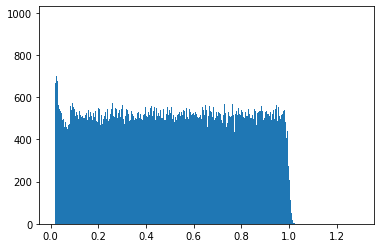

In [27]:
cnn_diff_predict=(Cnn_nparr[energy_test>energy_cut]-energy_test[energy_test>energy_cut])/energy_test[energy_test>energy_cut]
plt.hist(cnn_predict, bins=500)

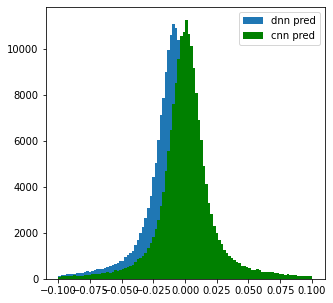

In [32]:
fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.hist(dnn_diff_pred, bins = 100, range=[-0.1,0.1], label = "dnn pred") 
#ax.hist(diff_sum, alpha = 0.6, bins = 100, range=[-0.1,0.1], label = "sum algo", color="r")
ax.hist(cnn_diff_predict,  bins = 100, range=[-0.1,0.1],color="g", label = "cnn pred") 
ax.legend()